# **Importando as bibliotecas que serão necessárias durante a execução do código**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

# **Exploração de Dados**

In [2]:
df = pd.read_csv('/kaggle/input/credito-ebac/credito.csv', na_values='na')
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


# **Calculando a porcentagem de clientes adimplentes e inadimplentes tem cadastrados**

In [3]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape

qtd_total,_ = df.shape
qtd_adimplentes,_ = df[df['default'] == 0].shape
qtd_inadimplentes,_ = df[df['default'] == 1].shape

print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


# **Conferindo os tipos de cada dado do arquivo credito.csv**

In [4]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

** > **Identificado três erros, o 'id', o 'limite_credito' e o 'valor_transacoes_12m' são, respectivamente, do tipo: int64, object(str) e objectr(str). Quando deveriam está em: object, float64, float64 respectivamente.**

In [5]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [6]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


# **Etapa de limpeza e transformação**

In [7]:
lambda valor: float(valor.replace(".","").replace(",", "."))
          
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = map(lambda valor: float(valor.replace(".","").replace(",", ".")) , valores_originais)

print(valores_originais)
print(list(valores_limpos))

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [8]:
lambda id: float(id.replace('.', '""'))



<function __main__.<lambda>(id)>

In [9]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".","").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".","").replace(",", ".")))
df['id'] = df['id'].apply(lambda id: f'"{id}"')



# **Conferindo se as alterações deram certo**

In [10]:
df.dtypes

id                          object
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

# **Deletando dados que faltam informações**

In [11]:
df.dropna(inplace=True)

# Valor novo, em porcentagem, de clientes adimplentes e inadiplentes ativos

In [12]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape

qtd_totalnova,_ = df.shape
qtd_adimplentesnova,_ = df[df['default'] == 0].shape
qtd_inadimplentesnova,_ = df[df['default'] == 1].shape

print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentesnova / qtd_totalnova, 2)}%")
print(f"A proporção de clientes adimplentes era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print("")
print(f'A proporção de clientes inadimplenres é de {round(100 * qtd_inadimplentesnova / qtd_totalnova, 2)}%')
print(f'A proporção de clientes inadimplenres era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 84.28%
A proporção de clientes adimplentes era de 83.93%

A proporção de clientes inadimplenres é de 15.72%
A proporção de clientes inadimplenres era de 16.07%


# **Visualização de dados(Graficos)**

# **Escolaridade**


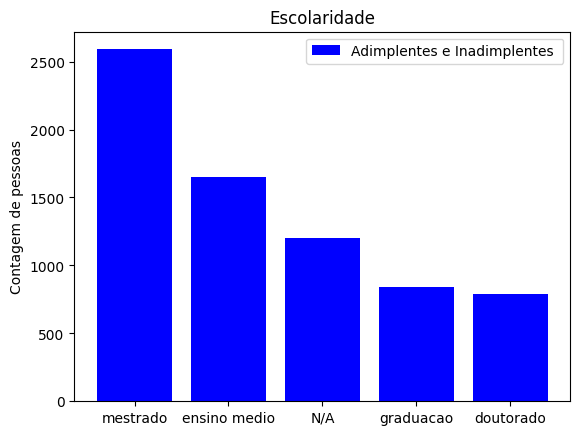

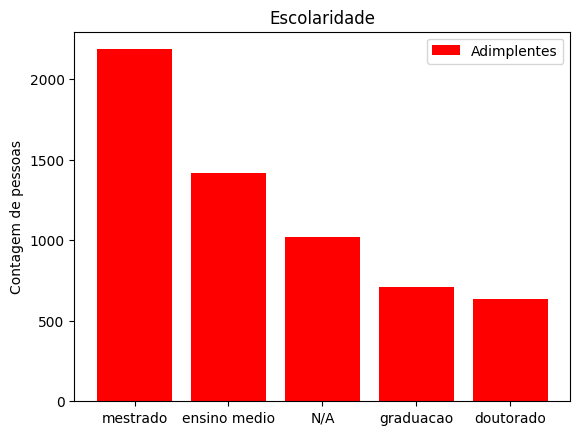

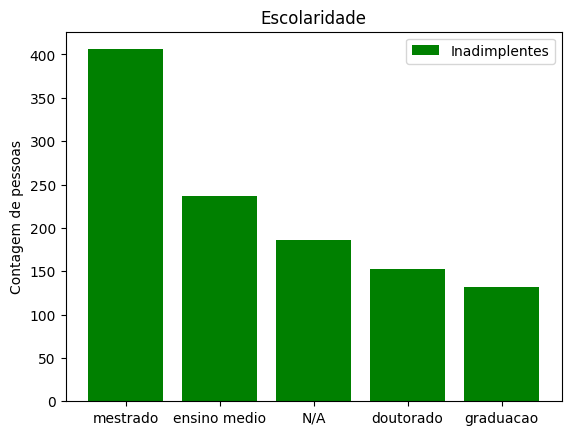

In [13]:
df.loc[df['escolaridade'] == 'sem educacao formal', 'escolaridade'] = 'N/A'

df1 = df['default'] == 1
df0 = df['default'] == 0 
df2 = df1 + df0

fig, ax = plt.subplots()
ax.bar(df[df2]['escolaridade'].value_counts().index, 
       df[df2]['escolaridade'].value_counts(), 
       color='b', label='Adimplentes e Inadimplentes ')


ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Escolaridade')


ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(df[df['default'] == 0]['escolaridade'].value_counts().index, 
       df[df['default'] == 0]['escolaridade'].value_counts(), 
       color='r', label='Adimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Escolaridade')

ax.legend()
plt.show()



fig, ax = plt.subplots()
ax.bar(df[df['default'] == 1]['escolaridade'].value_counts().index, 
       df[df['default'] == 1]['escolaridade'].value_counts(), 
       color='g', label='Inadimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Escolaridade')

ax.legend()
plt.show()







# **Salario anual**

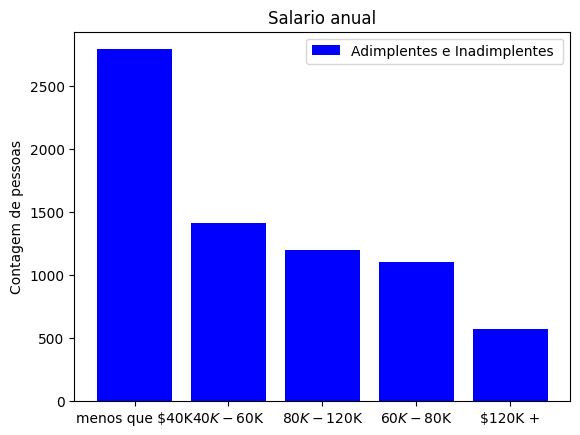

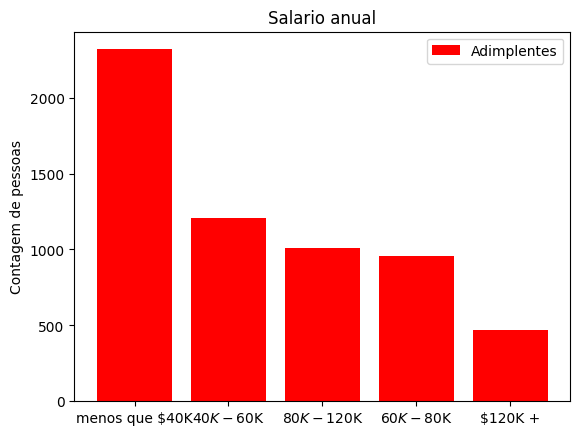

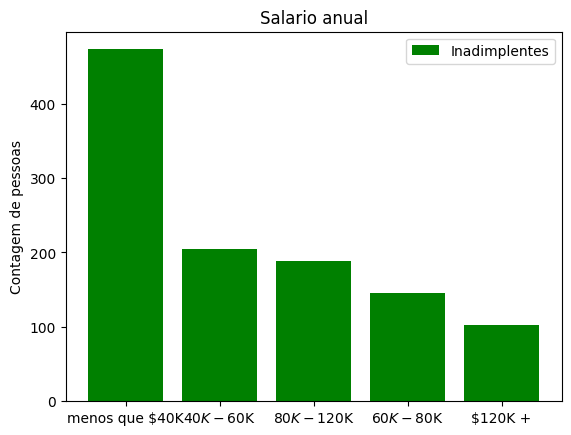

In [14]:
df1 = df['default'] == 1
df0 = df['default'] == 0 
df2 = df1 + df0

fig, ax = plt.subplots()
ax.bar(df[df2]['salario_anual'].value_counts().index, 
       df[df2]['salario_anual'].value_counts(), 
       color='b', label='Adimplentes e Inadimplentes ')


ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Salario anual')


ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(df[df['default'] == 0]['salario_anual'].value_counts().index, 
       df[df['default'] == 0]['salario_anual'].value_counts(), 
       color='r', label='Adimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Salario anual')

ax.legend()
plt.show()



fig, ax = plt.subplots()
ax.bar(df[df['default'] == 1]['salario_anual'].value_counts().index, 
       df[df['default'] == 1]['salario_anual'].value_counts(), 
       color='g', label='Inadimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Salario anual')

ax.legend()
plt.show()

# **Transações dos ultimos 12 meses**

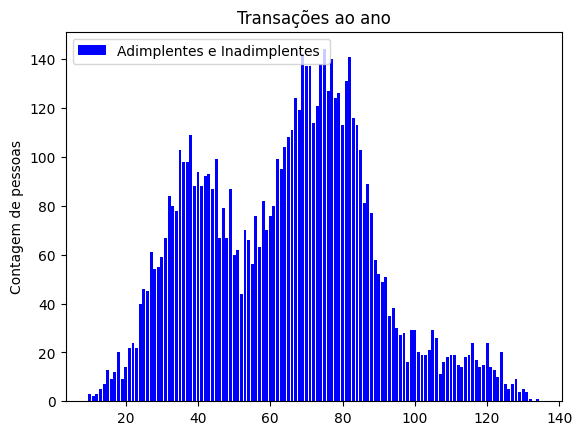

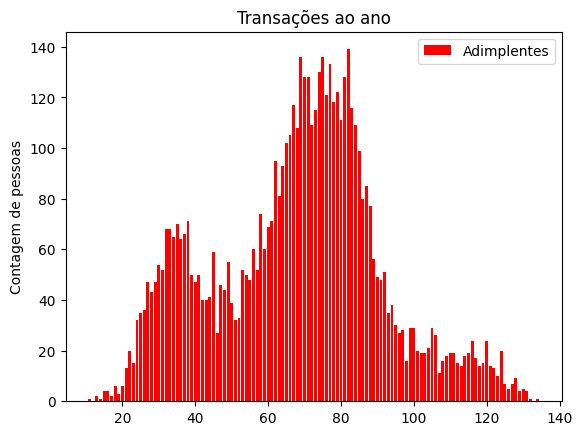

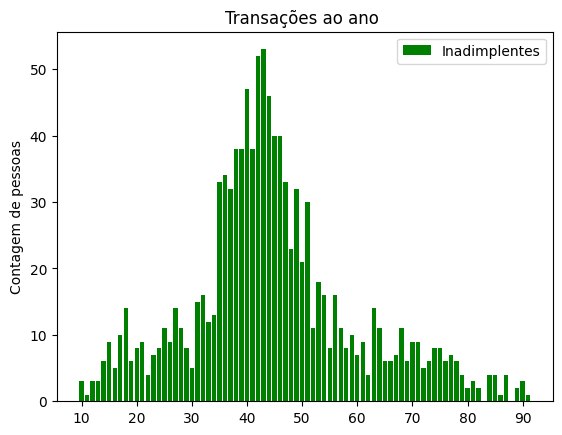

In [15]:
df1 = df['default'] == 1
df0 = df['default'] == 0 
df2 = df1 + df0

fig, ax = plt.subplots()
ax.bar(df[df2]['qtd_transacoes_12m'].value_counts().index, 
       df[df2]['qtd_transacoes_12m'].value_counts(), 
       color='b', label='Adimplentes e Inadimplentes ')


ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Transações ao ano')


ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(df[df['default'] == 0]['qtd_transacoes_12m'].value_counts().index, 
       df[df['default'] == 0]['qtd_transacoes_12m'].value_counts(), 
       color='r', label='Adimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Transações ao ano')

ax.legend()
plt.show()



fig, ax = plt.subplots()
ax.bar(df[df['default'] == 1]['qtd_transacoes_12m'].value_counts().index, 
       df[df['default'] == 1]['qtd_transacoes_12m'].value_counts(), 
       color='g', label='Inadimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de pessoas')
ax.set_title('Transações ao ano ')

ax.legend()
plt.show()

# **Valores de transação nos ultimos 12 meses**

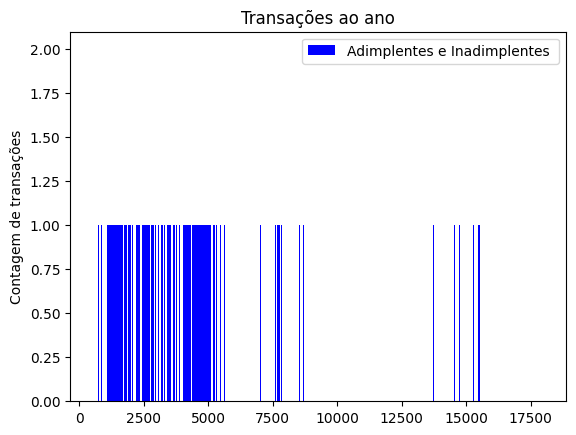

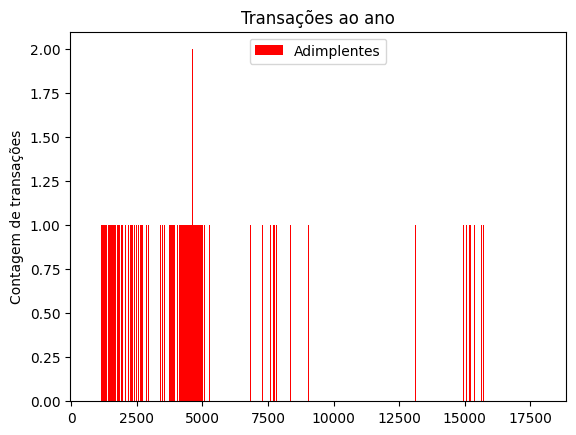

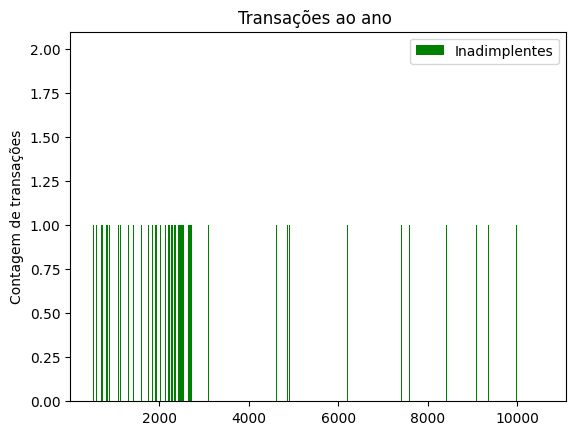

In [16]:
df1 = df['default'] == 1
df0 = df['default'] == 0 
df2 = df1 + df0

fig, ax = plt.subplots()
ax.bar(df[df2]['valor_transacoes_12m'].value_counts().index, 
       df[df2]['valor_transacoes_12m'].value_counts(), 
       color='b', label='Adimplentes e Inadimplentes ')


ax.set_xlabel('')
ax.set_ylabel('Contagem de transações')
ax.set_title('Transações ao ano')


ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(df[df['default'] == 0]['valor_transacoes_12m'].value_counts().index, 
       df[df['default'] == 0]['valor_transacoes_12m'].value_counts(), 
       color='r', label='Adimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de transações')
ax.set_title('Transações ao ano')

ax.legend()
plt.show()



fig, ax = plt.subplots()
ax.bar(df[df['default'] == 1]['valor_transacoes_12m'].value_counts().index, 
       df[df['default'] == 1]['valor_transacoes_12m'].value_counts(), 
       color='g', label='Inadimplentes')

ax.set_xlabel('')
ax.set_ylabel('Contagem de transações')
ax.set_title('Transações ao ano ')

ax.legend()
plt.show()


# **Storytelling**

O codigo, durante sua execução, apresetou apenas erro de 'types', no qual o 'id', o 'valor_transices_12m' e 'limite_credito' estavam com 'types' diferentes dos originais.
Neste codigo, foram apresentados o calculo, em porcentagem, dos clientes adimplentes e inadimplesntes da empresa, e como foi encontrado os erros de 'types', foi executado um processo de limpeza e transformção de dados, no qual trocou o 'type' dos elementos que estavam incorretos. Logo após, foi executado um processo para dedletar itens com dados faltantes e novamente feito um calculo com clientes adimplentes e inadimplesntes da empresa, agora não contando mais com os clientes que continam dados faltantes.
Logo após, foi demonstrados graficos de Escolaridade, Salario anual, Transações dos ultimos 12 meses, Valores das transções dos ultimos 12 meses, assim podendo medir quem tem mais chance de dar prejuizo a empresa com um emprestimo ou não, através das transações e valores delas.